## objectives
#### Business objectives
##### - How can we optimize our profit?
##### - What are the emerging trends that we can find?
##### - How can we take these findings to build recommednations?
#### Project objective
##### - A clear summary of business objectives.
##### - Dashboard with visualization and results.
##### - Recommednations based on the analysis.

In [2]:
import pandas as pd

First I'll import the dataset of Superstore, dataset was gathered from Kaggle website ["Here](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

In [3]:
store = pd.read_csv(r"C:\Users\moham\Downloads\Projects\Superstore\Dataset\encoded-Sample - Superstore - Modified -.csv")

First step is to process and clean data in order to perform the analysis  on it, those includes:    

    - Observe data
    - Check for missing data
    - remove dublicate rows
    - Correctly format columns that needs it.

In [4]:
store.set_index("RowID", inplace= True)

In [5]:
store.drop_duplicates()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
RowID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39


In [6]:
store.dtypes

OrderID          object
OrderDate        object
ShipDate         object
ShipMode         object
CustomerID       object
CustomerName     object
Segment          object
Country          object
City             object
State            object
PostalCode        int64
Region           object
ProductID        object
Category         object
SubCategory      object
ProductName      object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### We're going to make sure that all the columns on the dataframe are on the appropriate fromat in order for us to perform the analysis

In [7]:
from datetime import datetime

In [9]:
store["ShipDate"]= store["ShipDate"].apply(lambda y: datetime.strptime(y, '%m/%d/%Y').date())

We're going to seperate a column for "Year" from the orderdate column

In [14]:
store["Year"] = pd.to_datetime(store['OrderDate'], errors='coerce').dt.year

In [230]:
prof_year = store[["Year", "Sales", "Profit"]].groupby("Year").agg({"Sales": "sum", "Profit": "mean"}).sort_values(by="Year")
prof_year

,Sales,Profit
Year,,
2014,484247.56,24.859037
2015,470532.46,29.314315
2016,609205.86,31.617808
2017,733215.19,28.212491


The data above shows that the profit has increased steadily over the years, despite the lack in sales in 2015.

In [33]:
store["OrderDate"] = pd.to_datetime(store["OrderDate"])

In [46]:
store['year'] = store['OrderDate'].dt.year
store['quarter'] = store['OrderDate'].dt.month.apply(lambda x: 'Q1' if x in [1, 2, 3] else ('Q2' if x in [4, 5, 6] else ('Q3' if x in [7, 8, 9] else 'Q4')))

# Grouping by year and quarter, and calculating total sales and profit
Numbers_quarter = store.groupby(['year', 'quarter']).agg(total_sales=('Sales', 'sum'), total_profit=('Profit', 'sum')).reset_index()

# Sorting the result DataFrame
Numbers_quarter = Numbers_quarter.sort_values(by=['year', 'quarter'])

# Displaying the result
print(Numbers_quarter)

    year quarter  total_sales  total_profit
0   2014      Q1     74447.86       3811.20
1   2014      Q2     86538.77      11204.16
2   2014      Q3    143633.18      12804.73
3   2014      Q4    179627.75      21723.97
4   2015      Q1     68851.74       9264.94
5   2015      Q2     89124.28      12190.92
6   2015      Q3    130259.51      16853.70
7   2015      Q4    182296.93      23309.13
8   2016      Q1     93237.20      11441.39
9   2016      Q2    136082.33      16390.30
10  2016      Q3    143787.43      15823.63
11  2016      Q4    236098.90      38139.95
12  2017      Q1    123144.84      23506.21
13  2017      Q2    133764.33      15499.42
14  2017      Q3    196251.94      26985.26
15  2017      Q4    280054.08      27448.88


In [50]:
qt_perf = Numbers_quarter[["quarter" ,"total_sales", "total_profit"]].groupby("quarter").sum()

In [49]:
# Formatting the numbers with commas and adding dollar sign
qt_perf['total_sales'] = qt_perf['total_sales'].map('${:,.2f}'.format)
qt_perf['total_profit'] = qt_perf['total_profit'].map('${:,.2f}'.format)

# Displaying the result
print(qt_perf)

    year quarter  total_sales  total_profit
0   2014      Q1     74447.86       3811.20
1   2014      Q2     86538.77      11204.16
2   2014      Q3    143633.18      12804.73
3   2014      Q4    179627.75      21723.97
4   2015      Q1     68851.74       9264.94
5   2015      Q2     89124.28      12190.92
6   2015      Q3    130259.51      16853.70
7   2015      Q4    182296.93      23309.13
8   2016      Q1     93237.20      11441.39
9   2016      Q2    136082.33      16390.30
10  2016      Q3    143787.43      15823.63
11  2016      Q4    236098.90      38139.95
12  2017      Q1    123144.84      23506.21
13  2017      Q2    133764.33      15499.42
14  2017      Q3    196251.94      26985.26
15  2017      Q4    280054.08      27448.88


In [56]:
qt_perf

,total_sales,total_profit
quarter,,
Q1,"$359,681.64","$48,023.74"
Q2,"$445,509.71","$55,284.80"
Q3,"$613,932.06","$72,467.32"
Q4,"$878,077.66","$110,621.93"


This table shows the proffit generated per each quarter, and such info can be vital for investors, as it showing that, in those years, the fourth quarter is the most profitable one.

In [62]:
reg_perf = store[["Region", "Sales", "Profit"]].groupby("Region").agg(total_sales=('Sales', 'sum'), total_profit=('Profit', 'sum'))

In [65]:
reg_perf = reg_perf.sort_values(by= ["total_sales", "total_profit"], ascending= [False, False])

In [66]:
reg_perf

,total_sales,total_profit
Region,,
West,725457.93,108418.79
East,678781.36,91522.84
Central,501239.88,39706.45
South,391721.90,46749.71


The table above shows the profit per each region, as it shown, the West and East region are doing very well. However, the central region, even though it generated more revenue than the south region, it's still not bringing the same profit, as it will be shown by the profit margin down below as well.

In [97]:
reg_perf["profit_margin"] = reg_perf.apply(lambda x: (x["total_profit"] / x["total_sales"]) * 100, axis = 1)

In [98]:
reg_perf

,total_sales,total_profit,profit_margin
Region,,,
West,725457.93,108418.79,14.944876
East,678781.36,91522.84,13.483405
Central,501239.88,39706.45,7.921646
South,391721.90,46749.71,11.934413


In [81]:
state_performance = store[["State","Sales", "Profit"]].groupby("State").agg(Total_Sales= ("Sales", "sum"), Total_Profit=("Profit", "sum")).sort_values(by="Total_Profit", ascending= False)

In [82]:
state_performance

,Total_Sales,Total_Profit
State,,
California,457687.68,76381.60
New York,310876.20,74038.64
Washington,138641.29,33402.70
Michigan,76269.61,24463.15
Virginia,70636.72,18598.00
Indiana,53555.36,18382.97
Georgia,49095.84,16250.08
Kentucky,36591.75,11199.70
Minnesota,29863.15,10823.22


In [92]:
state_performance["Profit_Margin"] = state_performance.apply(lambda x: (x["Total_Profit"] / x["Total_Sales"]) * 100, axis=1)


In [93]:
state_performance

,Total_Sales,Total_Profit,Profit_Margin
State,,,
California,457687.68,76381.60,16.688586
New York,310876.20,74038.64,23.816117
Washington,138641.29,33402.70,24.092895
Michigan,76269.61,24463.15,32.074571
Virginia,70636.72,18598.00,26.329082
Indiana,53555.36,18382.97,34.325173
Georgia,49095.84,16250.08,33.098690
Kentucky,36591.75,11199.70,30.607172
Minnesota,29863.15,10823.22,36.242727


This table shows the profit margin per state, profit margins are important for long-term plans. For instance, even though California's profit margin isn't as high as Washington and New York, it still generates a pretty high revenue which tells us that we need to focus on it along with the other aforementioned states to capitalize on those sales numbers.

In [100]:
state_performance.tail(10).sort_values(by= "Total_Profit", ascending= False)

,Total_Sales,Total_Profit,Profit_Margin
State,,,
Oregon,17431.14,-1190.48,-6.829616
Florida,89473.73,-3399.25,-3.799160
Arizona,35282.02,-3427.87,-9.715629
Tennessee,30661.92,-5341.66,-17.421153
Colorado,32108.12,-6527.86,-20.330870
North Carolina,55603.09,-7490.81,-13.471931
Illinois,80166.16,-12607.89,-15.727197
Pennsylvania,116512.02,-15560.04,-13.354880
Ohio,78258.21,-16971.37,-21.686376


These are the lowest states in terms of profit, and Texas especially is alarming, as it had more sales than Washington but still made a loss of 25k.

In [102]:
City_performance = store[["City","Sales", "Profit"]].groupby("City").agg(Total_Sales= ("Sales", "sum"), Total_Profit=("Profit", "sum")).sort_values(by="Total_Profit", ascending= False)

In [105]:
City_performance["Profit_Margin"] = City_performance.apply(lambda x: (x["Total_Profit"] / x["Total_Sales"]) * 100, axis = 1)

In [106]:
City_performance

,Total_Sales,Total_Profit,Profit_Margin
City,,,
New York City,256368.12,62037.08,24.198438
Los Angeles,175851.33,30440.94,17.310611
Seattle,119540.74,29156.13,24.390120
San Francisco,112669.09,17507.39,15.538769
Detroit,42446.94,13181.79,31.054747
...,...,...,...
Chicago,48539.59,-6654.55,-13.709531
Lancaster,9891.48,-7239.08,-73.185004
San Antonio,21843.54,-7299.06,-33.415188


In [107]:
City_performance.tail(10)

,Total_Sales,Total_Profit,Profit_Margin
City,,,
Jacksonville,44713.18,-2323.80,-5.197125
Aurora,11656.47,-2691.76,-23.092411
Phoenix,11000.27,-2790.85,-25.370741
Dallas,20131.90,-2846.55,-14.139500
Burlington,21668.08,-3622.88,-16.719894
Chicago,48539.59,-6654.55,-13.709531
Lancaster,9891.48,-7239.08,-73.185004
San Antonio,21843.54,-7299.06,-33.415188
Houston,64504.71,-10153.48,-15.740680


These are the lowest rated cities in terms of profit, again we have 2 from Texas, so it's clear that some changes need to be made there.

In [118]:
disc_sales = store[["Discount", "Sales"]].groupby("Discount").agg(Avg_Sale=("Sales", "mean")).sort_values(by="Avg_Sale", ascending= False)

In [119]:
disc_sales

,Avg_Sale
Discount,
0.50,892.706818
0.10,578.396809
0.40,565.135097
0.32,536.794444
0.15,529.972885
0.45,498.634545
0.30,454.743436
0.00,226.742074
0.20,209.076916


In [122]:
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='Discount'>

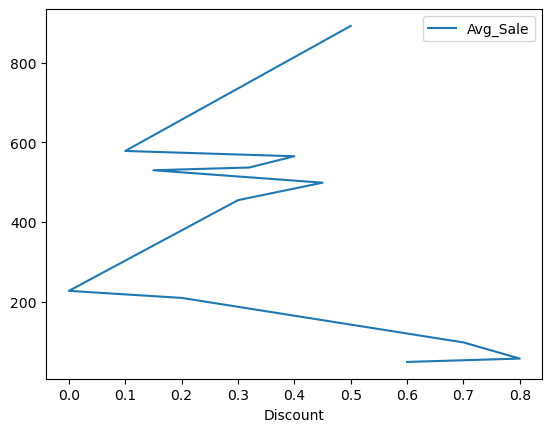

In [126]:
disc_sales.plot()

In [127]:
import seaborn as sns

<Axes: xlabel='Discount', ylabel='Avg_Sale'>

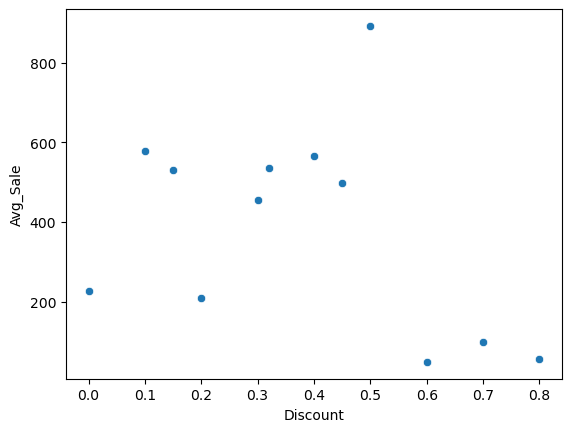

In [128]:
sns.scatterplot(x= "Discount", y="Avg_Sale", data=disc_sales)

From the graph shape we can deduce that there are no correlation between discount and sales numbers, however we can clearly tell that at 50% off that generates the highest sales by far.

In [144]:
dis_per_cat = store[["Category", "Discount"]].groupby("Category").agg(total_discount= ("Discount", "sum")).sort_values(by="total_discount", ascending= False)

In [151]:
cat_disc = store[["Category", "SubCategory", "Discount"]].groupby(["Category", "SubCategory"]).agg(total_dicount = ("Discount", "sum"))

In [154]:
prof_cat = store[["Category","Sales", "Profit"]].groupby("Category").agg(Total_Sales=("Sales", "sum"), Total_Profit= ("Profit", "sum"))

In [156]:
prof_cat["Profit_Margin"] = prof_cat.apply(lambda x: (x["Total_Profit"] / x["Total_Sales"]) * 100, axis= 1)

In [157]:
prof_cat

,Total_Sales,Total_Profit,Profit_Margin
Category,,,
Furniture,741999.98,18451.25,2.486691
Office Supplies,719046.99,122490.88,17.035170
Technology,836154.10,145455.66,17.395796


In [164]:
 reg_cat_pro = store.groupby(["Region", "Category"]).agg(Total_Sales=("Sales", "sum"), Total_Profit= ("Profit", "sum"))

,Sales,Profit
Total_Sales,2297201.07,NaN
Total_Profit,NaN,286397.79


In [161]:
state_cat_pro = store.groupby(["State", "Category"]).agg(Total_Sales=("Sales", "sum"), Total_Profit= ("Profit", "sum"))

In [162]:
state_cat_pro.tail(15)

Total_Sales  Total_Profit
State         Category                                  
Vermont       Furniture            5120.10       1191.93
              Office Supplies      2209.51        605.76
              Technology           1599.76        447.29
Virginia      Furniture           25321.95       5204.34
              Office Supplies     21169.61       5985.91
              Technology          24145.16       7407.75
Washington    Furniture           48020.16       7193.80
              Office Supplies     40084.42      11189.48
              Technology          50536.71      15019.42
West Virginia Furniture             673.34        -76.95
              Office Supplies       536.48        262.88
Wisconsin     Furniture           17256.61       3838.95
              Office Supplies      6059.84       1965.75
              Technology           8798.16       2597.08
Wyoming       Furniture            1603.14        100.20

In [170]:
sub_prof = store.groupby("SubCategory").agg(Total_Sales= ("Sales", "sum"), Total_Profit= ("Profit", "sum"))

In [171]:
sub_prof["Profit_Margin"] = sub_prof.apply(lambda x: (x["Total_Profit"] / x["Total_Sales"]) * 100, axis= 1)

In [231]:
sub_prof = sub_prof.sort_values(by="Total_Profit", ascending= False)
sub_prof

,Total_Sales,Total_Profit,Profit_Margin
SubCategory,,,
Copiers,149528.01,55617.90,37.195640
Phones,330007.10,44516.25,13.489482
Accessories,167380.31,41936.78,25.054787
Paper,78479.24,34053.34,43.391526
Binders,203412.77,30221.64,14.857297
Chairs,328449.13,26590.15,8.095668
Storage,223843.59,21279.05,9.506214
Appliances,107532.14,18138.07,16.867580
Furnishings,91705.12,13059.25,14.240481


This table shows the profit margin for the 17 subcategories. The Copiers and paper profit margins are interesting on the long-term. On the other hand, the lowest 3 (Supplies, bookcases, and tables) needs to be reviewed properly as the sales are there but they are not making any profit.

In [177]:
reg_sub_prof = store.pivot_table(index=['Region', 'SubCategory'], values=['Sales', 'Profit'], aggfunc={'Sales': 'sum', 'Profit': 'sum'}).reset_index()

In [179]:
reg_sub_prof = reg_sub_prof.sort_values(by="Profit", ascending= False)

In [180]:
reg_sub_prof

,Region,SubCategory,Profit,Sales
57,West,Copiers,19327.25,49749.23
23,East,Copiers,17022.88,53219.46
51,West,Accessories,16484.62,61114.10
54,West,Binders,16096.78,55961.11
6,Central,Copiers,15608.86,37259.57
...,...,...,...,...
1,Central,Appliances,-2638.61,23581.98
16,Central,Tables,-3559.68,39155.07
9,Central,Furnishings,-3906.18,15254.35
50,South,Tables,-4623.06,43916.19


In [182]:
state_sub_prof = store.pivot_table(index=['State', 'SubCategory'], values=['Sales', 'Profit'], aggfunc={'Sales': 'sum', 'Profit': 'sum'}).sort_values(by="Profit", ascending= False).reset_index()
state_sub_prof

In [184]:
prod_prof = store.groupby("ProductName").agg(Total_Sales= ("Sales", "sum"), Total_Profit= ("Profit", "sum")).sort_values(by="Total_Profit", ascending= False)

In [248]:
prod_prof5 = prod_prof.head(5)
prod_loss5 = prod_prof.tail(5)

This table shows the best performing product, and once again the copiers emerged as the out most profitable product, we should keep up the stock with these.

In [233]:
seg_prof = store.groupby("Segment").agg(Total_Sales= ("Sales", "sum"), Total_Profit= ("Profit", "sum")).sort_values(by="Total_Profit", ascending= False)
seg_prof

,Total_Sales,Total_Profit
Segment,,
Consumer,1161401.34,134119.33
Corporate,706146.44,91979.45
Home Office,429653.29,60299.01


This table shows the profit generated by the different segments, and conumers seems to be our most profitable ones, which is good thing to point.

In [193]:
total_cus = store.agg(Total_customers= ("CustomerID", "nunique"))

In [234]:
reg_cus = store.groupby("Region").agg(Total_Customers= ("CustomerID", "nunique")).sort_values(by="Total_Customers", ascending= False)
reg_cus

,Total_Customers
Region,
West,686
East,674
Central,629
South,512


This table shows the number of customers per region, the west is where we have the biggest market, so it's no wonder its doing great in term of numbers.

In [199]:
state_cus = store.groupby("State").agg(Total_Customers= ("CustomerID", "nunique")).sort_values(by="Total_Customers", ascending= False)

In [200]:
state_cus.tail(10)

,Total_Customers
State,
Kansas,14
Idaho,11
Montana,8
South Dakota,5
Vermont,5
District of Columbia,4
Maine,3
North Dakota,2
West Virginia,2


In [235]:
sales_cus = store.groupby("CustomerID").agg(Total_Sales= ("Sales", "sum"), Total_Profit= ("Profit", "sum")).sort_values(by="Total_Sales", ascending=False)
sales_cus

,Total_Sales,Total_Profit
CustomerID,,
SM-20320,25043.07,-1980.75
TC-20980,19052.22,8981.32
RB-19360,15117.35,6976.09
TA-21385,14595.62,4703.80
AB-10105,14473.57,5444.81
...,...,...
RS-19870,22.33,9.58
MG-18205,16.74,-1.24
CJ-11875,16.52,1.65


This table shows the profit made by each customer. This can be exteremly helpful if the company wanted to establish a reward system, for example, and even though customer (SM-20320) has the highest sales number, the company is not making any profit out of that, as opposed to number two. 1

In [209]:
store.dtypes

OrderID                 object
OrderDate       datetime64[ns]
ShipDate        datetime64[ns]
ShipMode                object
CustomerID              object
CustomerName            object
Segment                 object
Country                 object
City                    object
State                   object
PostalCode               int64
Region                  object
ProductID               object
Category                object
SubCategory             object
ProductName             object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
Year                     int32
year                     int32
quarter                 object
dtype: object

In [207]:
store["ShipDate"] = pd.to_datetime(store["ShipDate"])

In [212]:
store["Avg_shipping_time"] = (store['ShipDate'] - store['OrderDate']).dt.days.round(1)

In [215]:
store["Avg_shipping_time"] = store["Avg_shipping_time"].mean().round(1)

Average shipping time is 4 days.

In [224]:
store['ShippingTime'] = (store['ShipDate'] - store['OrderDate']).dt.days.round(1)
# Calculate the average shipping time for each method
avg_shipping_time_per_method = store.groupby('ShipMode')['ShippingTime'].mean().reset_index().round(1)

In [229]:
avg_shipping_time_per_method = avg_shipping_time_per_method.sort_values(by="ShippingTime", ascending= True)

In [ ]:
prof_year
dt_perf
reg_perf
state_performance
City_performance
disc_sales
dis_per_cat
cat_disc
prof_cat
reg_cat_pro
state_cat_pro
sub_prof
reg_sub_prof
state_sub_prof
prod_prof
seg_prof
total_cus
reg_cus
state_cus
sales_cus
avg_shipping_time_per_method

In [237]:
path = "C:/Users/moham/Downloads/Projects/Superstore/ignorefiles"

In [250]:
prod_loss5.to_csv(path + "lossesProfit.csv")